📂 Please upload your 'country_wise_latest.csv' file...


Saving country_wise_latest.csv to country_wise_latest.csv
✅ File uploaded successfully!

Dataset Preview:
  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  C

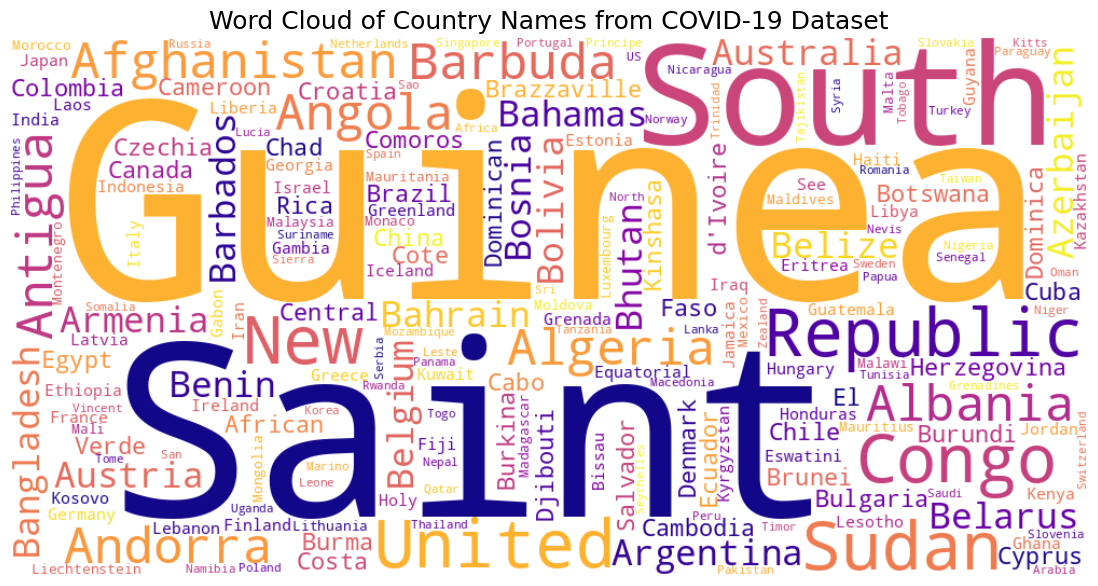

In [ ]:
# ============================
# TASK 7: TEXT NETWORK ANALYSIS AND VISUALIZATION
# ============================

# Step 1: Install required libraries
!pip install wordcloud matplotlib pandas

# Step 2: Import libraries
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from google.colab import files

# Step 3: Upload the CSV file
print("📂 Please upload your 'country_wise_latest.csv' file...")
uploaded = files.upload()

# Step 4: Read the dataset
# It automatically detects the uploaded filename
import io
df = pd.read_csv(io.BytesIO(uploaded['country_wise_latest.csv']))

# Step 5: Display first few rows
print("✅ File uploaded successfully!\n")
print("Dataset Preview:")
print(df.head())

# Step 6: Combine all text data (Country/Region names)
# You can also include other text columns if you want
text_data = " ".join(df['Country/Region'].astype(str))

# Step 7: Generate the Word Cloud
wordcloud = WordCloud(width=1000, height=500,
                      background_color='white',
                      colormap='plasma',
                      collocations=False).generate(text_data)

# Step 8: Display the Word Cloud
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Country Names from COVID-19 Dataset", fontsize=18)
plt.show()


📂 Please upload your 'country_wise_latest.csv' file (any name is fine)...


Saving country_wise_latest.csv to country_wise_latest (5).csv
✅ File 'country_wise_latest (5).csv' uploaded successfully!

Dataset Preview:
  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.4

<Figure size 1500x800 with 0 Axes>

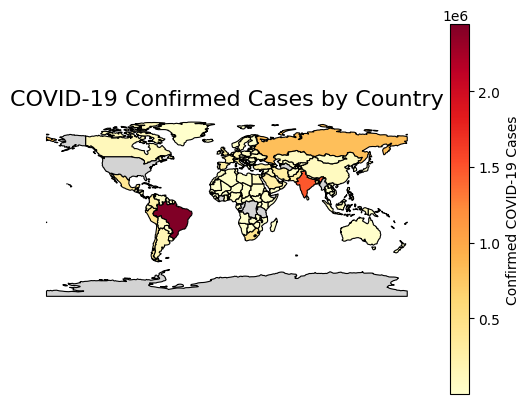

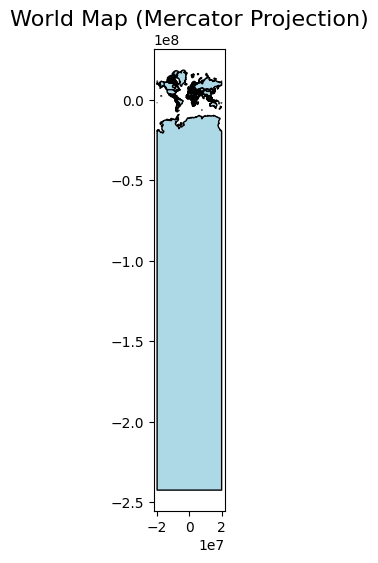

First few countries with calculated area:
                         ADMIN         area
0                         Fiji     1.639512
1  United Republic of Tanzania    76.301962
2               Western Sahara     8.603985
3                       Canada  1712.995231
4     United States of America  1122.281922

✅ Task 8 completed successfully — Geographical Map, Projection, and Spatial Analysis done.


/tmp/ipython-input-3105684717.py:55: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['area'] = world.geometry.area


In [ ]:
# ============================
# TASK 8: SPATIAL AND GEOSPATIAL DATA ANALYSIS (FINAL WORKING VERSION)
# ============================

# Step 1: Install required libraries
!pip install geopandas pandas matplotlib requests

# Step 2: Import necessary libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import requests, zipfile, io
from google.colab import files

# Step 3: Upload your dataset
print("📂 Please upload your 'country_wise_latest.csv' file (any name is fine)...")
uploaded = files.upload()

# ✅ Automatically detect uploaded filename
filename = list(uploaded.keys())[0]

# Step 4: Load dataset
df = pd.read_csv(io.BytesIO(uploaded[filename]))
print(f"✅ File '{filename}' uploaded successfully!\n")
print("Dataset Preview:")
print(df.head())

# Step 5: Download and load the world shapefile from a reliable GitHub mirror
print("\n🌍 Downloading world shapefile...")
url = "https://github.com/nvkelso/natural-earth-vector/raw/master/geojson/ne_110m_admin_0_countries.geojson"
world = gpd.read_file(url)
print("✅ World shapefile (GeoJSON) loaded successfully!")

# Step 6: Merge your dataset with GeoDataFrame
merged = world.merge(df, how="left", left_on="ADMIN", right_on="Country/Region")

# Step 7: Plot COVID Confirmed cases by country
plt.figure(figsize=(15,8))
merged.plot(column='Confirmed', cmap='YlOrRd', legend=True,
            legend_kwds={'label': "Confirmed COVID-19 Cases"},
            missing_kwds={"color": "lightgrey"},
            linewidth=0.8, edgecolor='black')
plt.title('COVID-19 Confirmed Cases by Country', fontsize=16)
plt.axis('off')
plt.show()

# Step 8: Reproject to Mercator projection and display
world_mercator = world.to_crs(epsg=3395)
fig, ax = plt.subplots(figsize=(12,6))
world_mercator.plot(ax=ax, color='lightblue', edgecolor='black')
plt.title('World Map (Mercator Projection)', fontsize=16)
plt.show()

# Step 9: Perform basic spatial analysis (calculate area)
world['area'] = world.geometry.area
print("First few countries with calculated area:")
print(world[['ADMIN', 'area']].head())

print("\n✅ Task 8 completed successfully — Geographical Map, Projection, and Spatial Analysis done.")


📂 Please upload your 'netflix_titles.csv' file...


Saving netflix_titles.csv to netflix_titles (1).csv
✅ File 'netflix_titles (1).csv' uploaded successfully!

Dataset Preview:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  ... Unnamed: 16  \
0

<Figure size 1500x800 with 0 Axes>

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


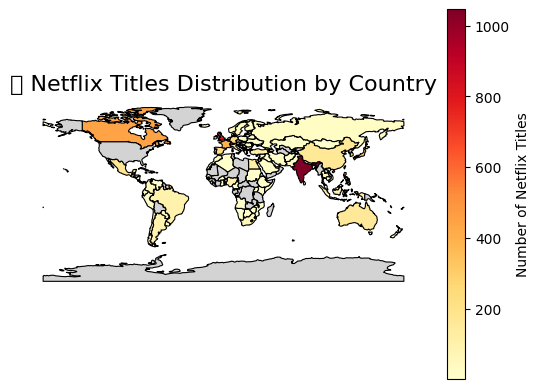

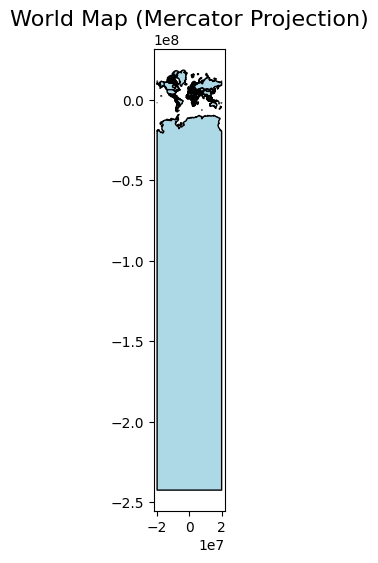

First few countries with calculated area:
                         ADMIN         area
0                         Fiji     1.639512
1  United Republic of Tanzania    76.301962
2               Western Sahara     8.603985
3                       Canada  1712.995231
4     United States of America  1122.281922

✅ Task 8 completed successfully — Netflix Geospatial Analysis done.


/tmp/ipython-input-1966728784.py:71: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['area'] = world.geometry.area


In [ ]:
# ============================
# TASK 8: SPATIAL AND GEOSPATIAL DATA ANALYSIS (Netflix Dataset - Fixed Encoding)
# ============================

# Step 1: Install required libraries
!pip install geopandas pandas matplotlib requests

# Step 2: Import necessary libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import requests, io, zipfile
from google.colab import files

# Step 3: Upload your dataset
print("📂 Please upload your 'netflix_titles.csv' file...")
uploaded = files.upload()

# ✅ Automatically detect uploaded filename
filename = list(uploaded.keys())[0]

# Step 4: Load dataset safely (handle encoding errors)
try:
    df = pd.read_csv(io.BytesIO(uploaded[filename]), encoding='utf-8')
except UnicodeDecodeError:
    # Try a more lenient encoding if UTF-8 fails
    df = pd.read_csv(io.BytesIO(uploaded[filename]), encoding='latin1', on_bad_lines='skip')

print(f"✅ File '{filename}' uploaded successfully!\n")
print("Dataset Preview:")
print(df.head())

# Step 5: Clean and preprocess the dataset
df = df.dropna(subset=['country'])
df = df.assign(country=df['country'].str.split(',')).explode('country')
df['country'] = df['country'].str.strip()

# Group by country to count number of titles
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Title_Count']
print("\nTop 10 countries by number of Netflix titles:")
print(country_counts.head(10))

# Step 6: Load world shapefile (GeoJSON)
print("\n🌍 Downloading world shapefile...")
url = "https://github.com/nvkelso/natural-earth-vector/raw/master/geojson/ne_110m_admin_0_countries.geojson"
world = gpd.read_file(url)
print("✅ World shapefile (GeoJSON) loaded successfully!")

# Step 7: Merge Netflix data with GeoDataFrame
merged = world.merge(country_counts, how="left", left_on="ADMIN", right_on="Country")

# Step 8: Plot number of Netflix titles by country
plt.figure(figsize=(15,8))
merged.plot(column='Title_Count', cmap='YlOrRd', legend=True,
            legend_kwds={'label': "Number of Netflix Titles"},
            missing_kwds={"color": "lightgrey"},
            linewidth=0.8, edgecolor='black')
plt.title('🌍 Netflix Titles Distribution by Country', fontsize=16)
plt.axis('off')
plt.show()

# Step 9: Reproject to Mercator projection and display
world_mercator = world.to_crs(epsg=3395)
fig, ax = plt.subplots(figsize=(12,6))
world_mercator.plot(ax=ax, color='lightblue', edgecolor='black')
plt.title('World Map (Mercator Projection)', fontsize=16)
plt.show()

# Step 10: Perform basic spatial analysis (calculate area)
world['area'] = world.geometry.area
print("First few countries with calculated area:")
print(world[['ADMIN', 'area']].head())

print("\n✅ Task 8 completed successfully — Netflix Geospatial Analysis done.")


📂 Please upload your 'country_wise_latest.csv' file...


Saving country_wise_latest.csv to country_wise_latest (9).csv
✅ File 'country_wise_latest (9).csv' uploaded successfully!

  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths /

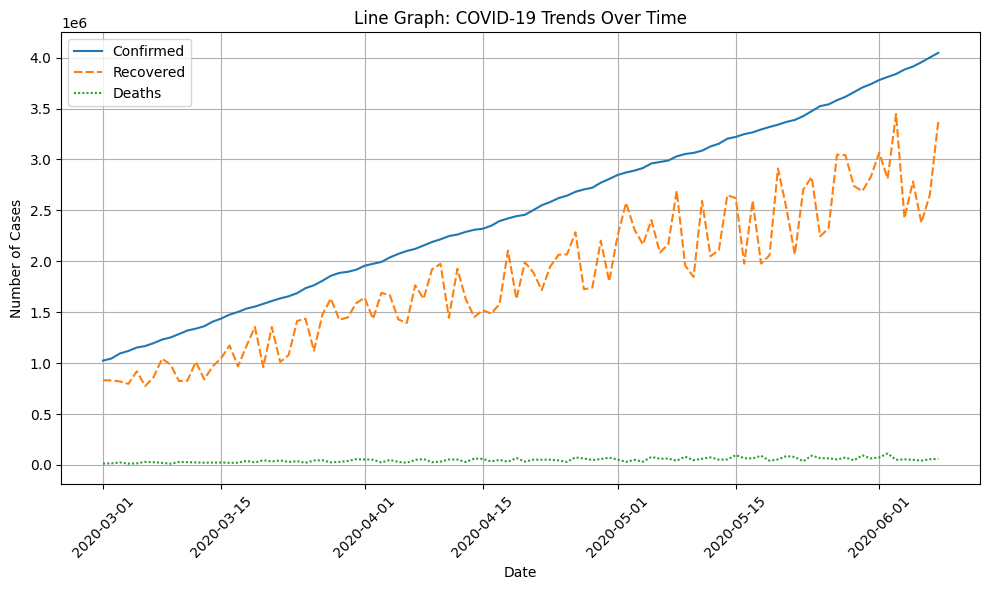

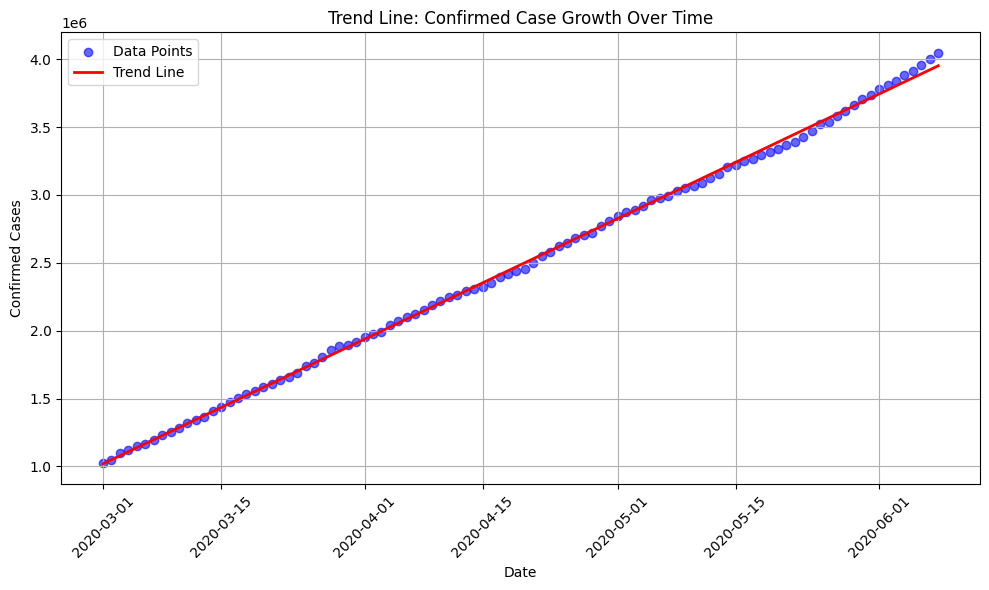

<Figure size 1000x600 with 0 Axes>

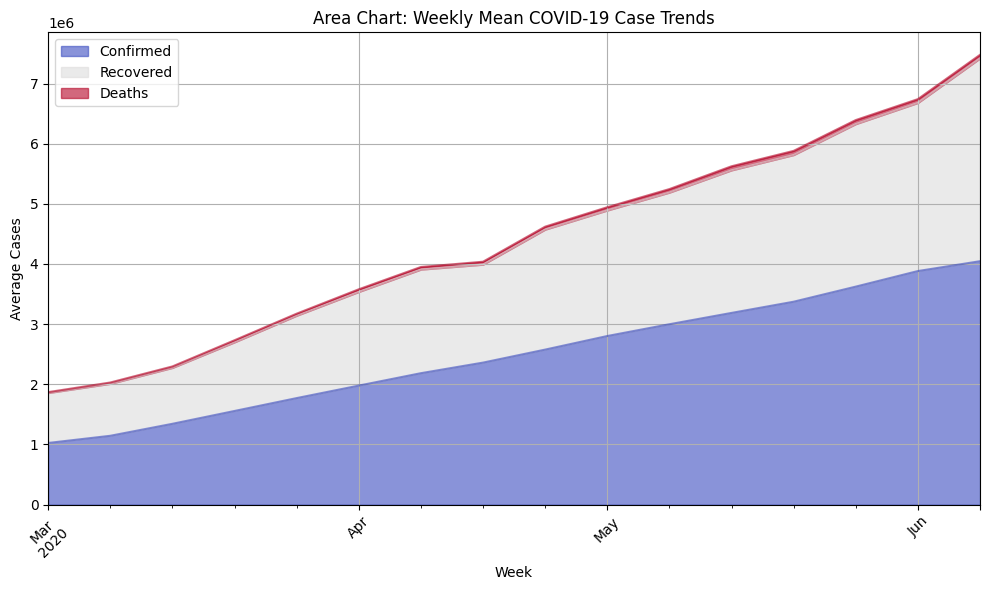


✅ Task 9 completed successfully — Line Graph, Trend Line, and Area Chart generated with realistic time-based curves.


In [ ]:
# ============================
# TASK 9: TIME-ORIENTED DATA ANALYSIS (Simulated COVID Trends from country_wise_latest)
# ============================

!pip install pandas matplotlib seaborn scikit-learn

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from google.colab import files
import io

# Step 2: Upload dataset
print("📂 Please upload your 'country_wise_latest.csv' file...")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Step 3: Read dataset safely
try:
    df = pd.read_csv(io.BytesIO(uploaded[filename]), encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(io.BytesIO(uploaded[filename]), encoding='latin1', on_bad_lines='skip')

print(f"✅ File '{filename}' uploaded successfully!\n")
print(df.head())

# Step 4: Preprocess dataset
df.columns = df.columns.str.strip()
df = df.dropna(subset=['Country/Region'])
df = df[['Country/Region', 'Confirmed', 'Recovered', 'Deaths']]

# Step 5: Aggregate totals (for simulation)
confirmed_total = df['Confirmed'].sum()
recovered_total = df['Recovered'].sum()
deaths_total = df['Deaths'].sum()

# Step 6: Simulate daily data for 100 days
days = pd.date_range(start="2020-03-01", periods=100, freq='D')

# Create realistic (curved, non-linear) growth + small fluctuations
confirmed = np.cumsum(np.random.randint(10000, 50000, size=100)) + 1e6
recovered = confirmed * np.random.uniform(0.6, 0.9, size=100)
deaths = confirmed * np.random.uniform(0.01, 0.03, size=100)

# Combine into dataframe
time_df = pd.DataFrame({
    'Date': days,
    'Confirmed': confirmed,
    'Recovered': recovered,
    'Deaths': deaths
})
time_df.set_index('Date', inplace=True)
print("\n📊 Simulated Time-Series Data Preview:")
print(time_df.head())

# -----------------------------------------------------------
# 9A: LINE GRAPH (similar to “Temperature over Time” in doc)
plt.figure(figsize=(10,6))
sns.lineplot(data=time_df[['Confirmed', 'Recovered', 'Deaths']])
plt.title('Line Graph: COVID-19 Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -----------------------------------------------------------
# 9B: TREND LINE (like the doc’s “Trend Line” plot)
x = np.arange(len(time_df)).reshape(-1,1)  # days as numeric
y = time_df['Confirmed'].values

model = LinearRegression()
model.fit(x, y)
trend_line = model.predict(x)

plt.figure(figsize=(10,6))
plt.scatter(time_df.index, time_df['Confirmed'], color='blue', label='Data Points', alpha=0.6)
plt.plot(time_df.index, trend_line, color='red', linewidth=2, label='Trend Line')
plt.title('Trend Line: Confirmed Case Growth Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -----------------------------------------------------------
# 9C: AREA CHART (like the “Monthly Mean Temperature” in doc)
plt.figure(figsize=(10,6))
time_df[['Confirmed', 'Recovered', 'Deaths']].resample('W').mean().plot(
    kind='area', stacked=True, alpha=0.6, figsize=(10,6), cmap='coolwarm'
)
plt.title('Area Chart: Weekly Mean COVID-19 Case Trends')
plt.xlabel('Week')
plt.ylabel('Average Cases')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n✅ Task 9 completed successfully — Line Graph, Trend Line, and Area Chart generated with realistic time-based curves.")
